<a href="https://colab.research.google.com/github/Leandro-Bernardo/Neural-Network-for-fire-detection/blob/main/10_Inserir_Fuma%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# variaveis que precisam ser mudadas para cada imagem :

# raio dos circulos de fumaca 
# raio crescente do proximo circulo de fumaça
# escala de cores 

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
import random
import math as mt
from math import cos

from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Imagens

##### Importa e plota as imagens

In [ ]:
path = '/content/drive/MyDrive/Artigos Científicos/Rede Neural/Treinamento_N'

In [ ]:
list_imagens = os.listdir(os.path.join(path,'Nao_Fumaca_Original'))  # lista as imagens contidas no diretório
list_imagens

['Corte3.jpeg',
 'Corte47.jpeg',
 'Corte139.jpeg',
 'Corte145.jpeg',
 'Corte154.jpeg',
 'Corte179.jpeg']

In [ ]:
# from IPython.display import Image
# Image(f'{path}/Nao_Fumaca/{imagens[0]}')

In [ ]:
imagens = [cv2.imread(f'{path}/Nao_Fumaca/{i}') for i in list_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens 


In [ ]:
imagens[:]

[array([[[171, 177, 146],
         [173, 179, 148],
         [175, 181, 150],
         ...,
         [185, 190, 163],
         [185, 190, 163],
         [182, 187, 160]],
 
        [[176, 181, 152],
         [176, 182, 151],
         [175, 180, 151],
         ...,
         [182, 187, 160],
         [180, 184, 159],
         [176, 181, 154]],
 
        [[175, 180, 153],
         [173, 178, 149],
         [170, 175, 148],
         ...,
         [192, 196, 171],
         [186, 189, 167],
         [177, 181, 156]],
 
        ...,
 
        [[ 93, 102,  99],
         [ 91, 100,  97],
         [ 82,  93,  90],
         ...,
         [ 93,  98,  96],
         [ 92,  97,  95],
         [ 91,  96,  94]],
 
        [[113, 122, 119],
         [106, 115, 112],
         [ 93, 102,  99],
         ...,
         [102, 107, 105],
         [100, 105, 103],
         [ 97, 102, 100]],
 
        [[117, 126, 123],
         [110, 119, 116],
         [ 95, 104, 101],
         ...,
         [106, 111, 109],
  

In [ ]:
i = len(imagens)
i

6

In [ ]:
coluna = 2
linha = int(i/2) if i%2 == 0 else int((i+1)/2)
linha,coluna   

(3, 2)

In [ ]:
k = 0

f, coords = plt.subplots(linha,coluna)  
for i in range(linha):
  for j in range(coluna):
    coords[i,j].imshow(imagens[k])

    k += 1

##### Define a imagem a ser processada

In [ ]:
# reseta as imagens para o padrão (caso tenham sido editadas antes)
imagens = [cv2.imread(f'{path}/Nao_Fumaca/{i}') for i in list_imagens]

In [ ]:
len(imagens)

6

In [ ]:
i = int(input(f'Qual imagem a ser editada? (0 à {len(imagens)-1})  '))

Qual imagem a ser editada? (0 à 5)  4


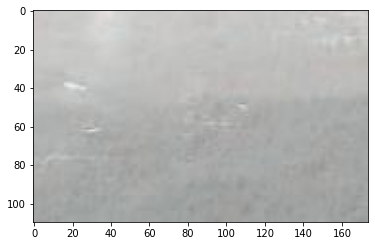

In [ ]:
plt.imshow(imagens[i])

In [ ]:
x,y = input('Ponto a ser adicionado a fumaça (x e y):   ').split()
x,y = int(x), int(y)

Ponto a ser adicionado a fumaça (x e y):   100 42


In [ ]:
x,y

(100, 42)

##### Adiciona fumaça na imagem selecionada

In [ ]:
# reseta as imagens para o padrão (caso tenham sido editadas antes)
imagens = [cv2.imread(f'{path}/Nao_Fumaca/{i}') for i in list_imagens]

In [ ]:
color = random.randint(130,180) # gera um numero aleatorio entre 150 e 220 para ser usado como cor na escala RGB
gray = (color, color, color)  #ton de cinza a ser adicionado nas imagens
raio = 10 #input('Raio do circulo inicial:   ')

In [ ]:
# manter a contagem ascendente da numeração k das imagens i

todas_imagens = os.listdir(f'{path}/Fumaca')  # pega todas as imagens de fumaça
lista_imagens = []

k = 0
num = 1

In [ ]:
for imagem in todas_imagens:
  # verifica se existe um exemplar k de fumaça da imagem i 
  if os.path.exists(f'{path}/Fumaca/imagem({i})_fig({k}).jpeg'):  
      lista_imagens.append(imagem)  # adiciona o exemplar em uma lista

for imagem in lista_imagens:   # verifica qual imagem está sendo editada (no caso, da imagem 0 à 5)
  num_imagem = imagem.split('imagem(')
  num_imagem = num_imagem[1].split(')_fig')
  num_imagem = int(num_imagem[0])

  if num_imagem != i :  # ignora a numeração das outras imagens diferentes da atual
    pass

  else:   # pega a numeração da ultima fig da imagem atual
    num = imagem.split('_fig(')
    num = num[1].split(').jpeg') 
    num = int(num[0]) 
  
  if num >= k and num_imagem == i:
    k = num + 1
  else: pass

print(k)

In [ ]:
'''
for maximo_circulos in range(1,8):
  cv2.imwrite(f'imagem({i})_fig({k}).jpeg', cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1))
  # cv2.imwrite salva a imagen gerada ; cv2.circle adiciona circulos nas imagens 

  k +=1

  # proxima imagem :
  #   centro do proximo circulo encostar no raio do circulo anterior (usando coordenadas polares)
  #   x = x0 + r cos(z)  (centro do proximo circulo (x) é o x anterior + raio atual (r) e um angulo aleatorio de rotacao (z) )
  #   y = y0 + r cos(z)  (analogo à x)
  #   z aleatorio e  30 > z > 150 

  raio += random.random() if raio <raio+1 else random.uniform(-10.5,12.5) # sorteia um novo raio em um intervalo  
                                                             # random() sorteia um float entre 0 e 1, uniform() sorteia um float entre um intervalo
  z = random.randint(30, 150) # sorteia um angulo aleatorio z ( 0 > z > 180 )

  novo_x = x + raio * mt.cos(z)
  x = novo_x
  novo_y = y + raio * mt.sin(z)
  y = novo_y

  color = random.randint(color-20, color+30) # proximo circulo de fumaca ter uma escala de cor parecida 
  gray = (color,color,color)

  if (maximo_circulos >= 8) & (maximo_circulos < 11):   # maximo de circulos é 8
    mais_um_circulo = random.randint(0,1) # 1 (True) adiciona mais um circulo , 0 (False) para de adicionar circulos

    if mais_um_circulo == True:  # refaz o processo de cima para adicionar mais circulos
       cv2.imwrite(f'imagem({i})_fig({k}).jpeg', cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1))
       raio += random.random() if raio <raio+1 else random.uniform(-0.5,2.5)                                                                
       z = random.randint(0, 180) 
       novo_x = x + raio * mt.cos(z)
       x = novo_x
       novo_y = y + raio * mt.sin(z)
       y = novo_y
       k +=1

    else: pass
  else: pass    

'''

"\nfor maximo_circulos in range(1,8):\n  cv2.imwrite(f'imagem({i})_fig({k}).jpeg', cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1))\n  # cv2.imwrite salva a imagen gerada ; cv2.circle adiciona circulos nas imagens \n\n  k +=1\n\n  # proxima imagem :\n  #   centro do proximo circulo encostar no raio do circulo anterior (usando coordenadas polares)\n  #   x = x0 + r cos(z)  (centro do proximo circulo (x) é o x anterior + raio atual (r) e um angulo aleatorio de rotacao (z) )\n  #   y = y0 + r cos(z)  (analogo à x)\n  #   z aleatorio e  30 > z > 150 \n\n  raio += random.random() if raio <raio+1 else random.uniform(-10.5,12.5) # sorteia um novo raio em um intervalo  \n                                                             # random() sorteia um float entre 0 e 1, uniform() sorteia um float entre um intervalo\n  z = random.randint(30, 150) # sorteia um angulo aleatorio z ( 0 > z > 180 )\n\n  novo_x = x + raio * mt.cos(z)\n  x = no

In [ ]:

for maximo_circulos in range(1,8):
  cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1)

  # proxima imagem :
  #   centro do proximo circulo encostar no raio do circulo anterior (usando coordenadas polares)
  #   x = x0 + r cos(z)  (centro do proximo circulo (x) é o x anterior + raio atual (r) e um angulo aleatorio de rotacao (z) )
  #   y = y0 + r cos(z)  (analogo à x)
  #   z aleatorio e  30 > z > 150 

  raio += random.random() if raio <raio+1 else random.uniform(-5.5,5.5) # sorteia um novo raio em um intervalo  
                                                             # random() sorteia um float entre 0 e 1, uniform() sorteia um float entre um intervalo
  z = random.randint(30, 150) # sorteia um angulo aleatorio z ( 0 > z > 180 )

  novo_x = x + raio * mt.cos(z)
  x = novo_x
  novo_y = y + raio * mt.sin(z)
  y = novo_y

  color = random.randint(color-20, color+30) # proximo circulo de fumaca ter uma escala de cor parecida 
  gray = (color,color,color)

# adiciona outro circulo na mesma imagem
  raio += random.random() if raio <raio+1 else random.uniform(-0.5,6.5) # sorteia um novo raio em um intervalo  
                                                             # random() sorteia um float entre 0 e 1, uniform() sorteia um float entre um intervalo
  z = random.randint(30, 100) # sorteia um angulo aleatorio z ( 0 > z > 180 )

  novo_x = x + raio * mt.cos(z)
  x = novo_x
  novo_y = y + raio * mt.sin(z)
  y = novo_y

  color = random.randint(color-20, color+30) # proximo circulo de fumaca ter uma escala de cor parecida 
  gray = (color,color,color)

  cv2.imwrite(f'imagem({i})_fig({k}).jpeg', cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1))
  # cv2.imwrite salva a imagen gerada ; cv2.circle adiciona circulos nas imagens 

  k +=1

  if (maximo_circulos >= 7) & (maximo_circulos < 12):   # maximo de circulos é 8
    mais_um_circulo = random.randint(0,1) # 1 (True) adiciona mais um circulo , 0 (False) para de adicionar circulos

    if mais_um_circulo == True:  # refaz o processo de cima para adicionar mais circulos
       cv2.imwrite(f'imagem({i})_fig({k}).jpeg', cv2.circle(img = imagens[i], center = (int(x),int(y)), radius = int(raio) , color = gray, thickness= -1))
       raio += random.random() if raio <raio+1 else random.uniform(-5.5,6.5)                                                                
       z = random.randint(0, 180) 
       novo_x = x + raio * mt.cos(z)
       x = novo_x
       novo_y = y + raio * mt.sin(z)
       y = novo_y
       k +=1

    else: pass
  else: pass    


In [ ]:
k

7

##### Move as imagens editadas

In [ ]:
for imagem in os.listdir('/content'):
  if 'imagem' in imagem:
    shutil.move(f'/content/{imagem}',f'{path}/Fumaca/')

#### nuke button 

In [ ]:
# apaga as imagens 

In [ ]:
for img in os.listdir('/content'):
  if 'imagem' in img:
   os.remove(img)

In [ ]:
# reseta as imagens  (desfaz os circulos q são adicionados in place)

In [ ]:
imagens = [cv2.imread(f'{path}/Nao_Fumaca/{i}') for i in list_imagens] #cv2.imread() retorna um array -> compreensão de lista para fazer upload de todas as imagens 


In [ ]:
# reseta o raio inicial

In [ ]:
raio = 1

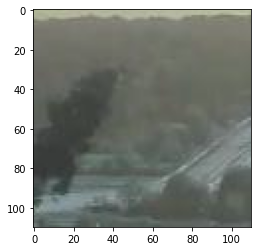

In [ ]:
plt.imshow(imagens[0])

### Testes

In [ ]:
# fig = plt.figure(figsize = (50,20))

# for i,j in enumerate(img):
#   plt.imshow(j)
#   plt.axis('off')
#   fig.add_subplot(linha,coluna,i+1)
#   linha+=1


In [ ]:
# img = cv2.imread(f'{path}/Nao_Fumaca/Corte3.jpeg')
# img

In [ ]:
# def click_event(event, x, y, flags, params):
  
#     # checking for left mouse clicks
#     if event == cv2.EVENT_LBUTTONDOWN:
  
#         # displaying the coordinates
#         # on the Shell
#         print(x, ' ', y)
  
#         # displaying the coordinates
#         # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' +
#                     str(y), (x,y), font,
#                     1, (255, 0, 0), 2)
#         cv2_imshow(img)
  
#     # checking for right mouse clicks     
#     if event==cv2.EVENT_RBUTTONDOWN:
  
#         # displaying the coordinates
#         # on the Shell
#         print(x, ' ', y)
  
#         # displaying the coordinates
#         # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
#         cv2_imshow(img)
  

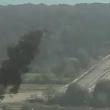

In [ ]:
# # driver function
# if __name__=="__main__":
  
#     # reading the image
# #    img = cv2.imread('lena.jpg', 1)
  
#     # displaying the image
#     cv2_imshow(img[0])
  
#     cv2.namedWindow("Window")

#     # setting mouse handler for the image
#     # and calling the click_event() function
#     cv2.setMouseCallback('Window', click_event)
  
#     # wait for a key to be pressed to exit
#     cv2.waitKey(0)
  
#     # close the window
#     cv2.destroyAllWindows()

In [ ]:
 cv2.setMouseCallback(f'{path}/Nao_Fumaca/{list_imagens[0]}.jpeg', click_event )

TypeError: ignored

In [ ]:
for i in range(len(img)):
  cv2_imshow(img[i])
  

In [ ]:
https://learnopencv.com/mouse-and-trackbar-in-opencv-gui/

In [ ]:
https://machinelearningknowledge.ai/quick-guide-for-drawing-circle-in-opencv-python-using-cv2-circle-with-examples/

In [ ]:
https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

In [ ]:
raio = 1
raio

1

In [ ]:
raio += random.random() if raio <raio+1 else random.uniform(-0.5,1.5) # sorteia um novo raio em um intervalo
raio

4.334022970812496

In [ ]:
img[0] = cv2.circle(img = img[0], center = (250,250), radius = 3 , color = (150,150,150), thickness= 10)

NameError: ignored

In [ ]:
a = '/content/drive/MyDrive/TCC/Videos/Treinamento_N/Fumaca/imagem(1ddd)'
a = a.split('imagem(')
a = a[1].split('ddd)')
a = int(a[0])
type(a)